# 📊 Screen Time and Productivity Analysis
This notebook analyzes the relationship between screen time and productivity using self-tracked data.
The hypothesis is:

**"Increased screen time reduces productivity."**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('custom_screen_time_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Total_Screen_Time,Productive_Screen_Time,Non_Productive_Screen_Time,Productivity_Score
0,2025-03-11,9.75,2.86,6.88,7.5
1,2025-03-12,9.97,4.52,5.45,9.4
2,2025-03-13,8.65,2.77,5.88,7.8
3,2025-03-14,11.37,3.77,7.60,8.0
4,2025-03-15,8.30,3.54,4.75,9.1


In [ ]:
df.describe()

,Date,Total_Screen_Time,Productive_Screen_Time,Non_Productive_Screen_Time,Productivity_Score
count,46,46.000000,46.000000,46.000000,46.000000
mean,2025-04-02 12:00:00,8.805000,2.959783,5.844565,8.039130
min,2025-03-11 00:00:00,5.070000,1.010000,1.250000,5.300000
25%,2025-03-22 06:00:00,8.100000,2.450000,4.785000,7.075000
50%,2025-04-02 12:00:00,8.920000,2.835000,5.530000,8.000000
75%,2025-04-13 18:00:00,9.535000,3.730000,7.015000,9.175000
max,2025-04-25 00:00:00,11.370000,4.850000,8.740000,10.000000
std,NaN,1.295283,1.002505,1.616824,1.358018


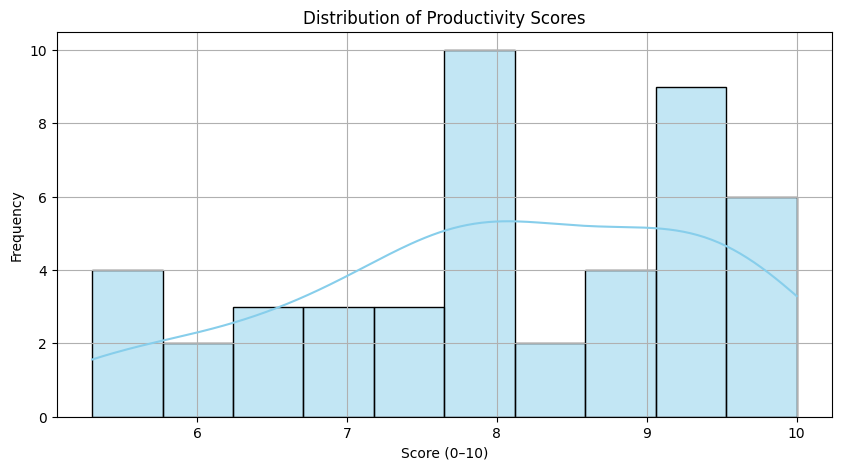

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Productivity_Score'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Productivity Scores')
plt.xlabel('Score (0–10)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

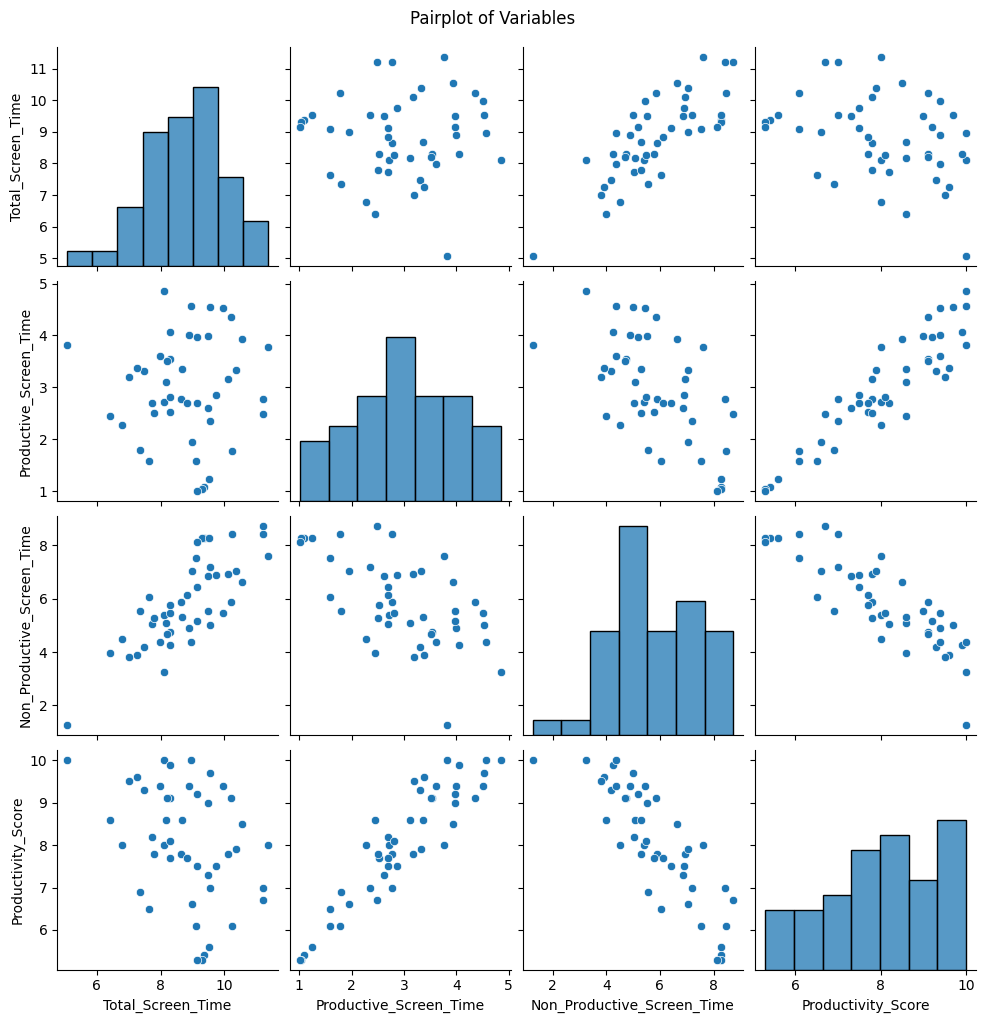

In [ ]:
sns.pairplot(df[['Total_Screen_Time', 'Productive_Screen_Time', 'Non_Productive_Screen_Time', 'Productivity_Score']])
plt.suptitle('Pairplot of Variables', y=1.02)
plt.show()

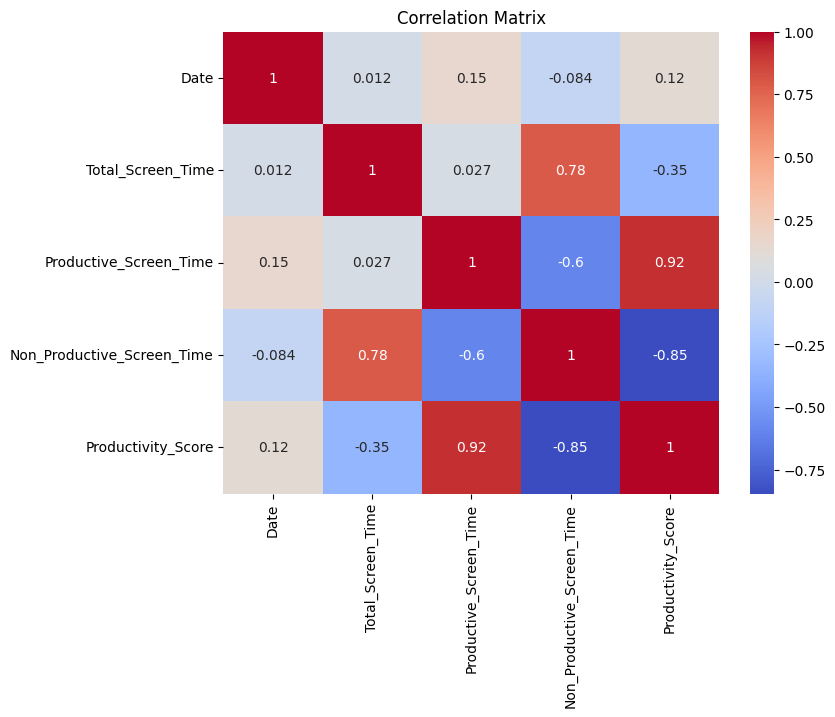

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

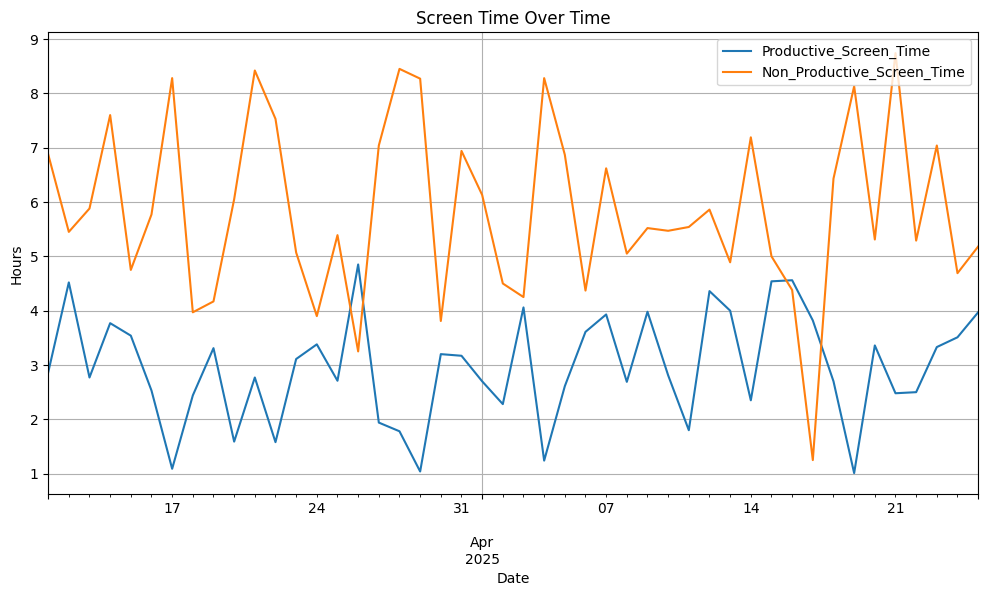

In [ ]:
df.set_index('Date')[['Productive_Screen_Time', 'Non_Productive_Screen_Time']].plot(figsize=(12, 6))
plt.title('Screen Time Over Time')
plt.ylabel('Hours')
plt.grid(True)
plt.show()

In [ ]:
print("\n🔍 Hypothesis Test:")
correlation, p_value = stats.pearsonr(df['Total_Screen_Time'], df['Productivity_Score'])
print(f"Pearson Correlation Coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis. Screen time is likely affecting productivity.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant relationship detected.")


🔍 Hypothesis Test:
Pearson Correlation Coefficient: -0.35
P-value: 0.0185
Conclusion: Reject the null hypothesis. Screen time is likely affecting productivity.


## 🧠 Machine Learning Models

### 📉 Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df['Productivity_Ratio'] = df['Productive_Screen_Time'] / df['Total_Screen_Time']
X = df[['Total_Screen_Time', 'Productive_Screen_Time', 'Non_Productive_Screen_Time', 'Productivity_Ratio']]
y = df['Productivity_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print('Linear Regression R2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

Linear Regression R2: 0.979631304178808
MSE: 0.03699973595919527


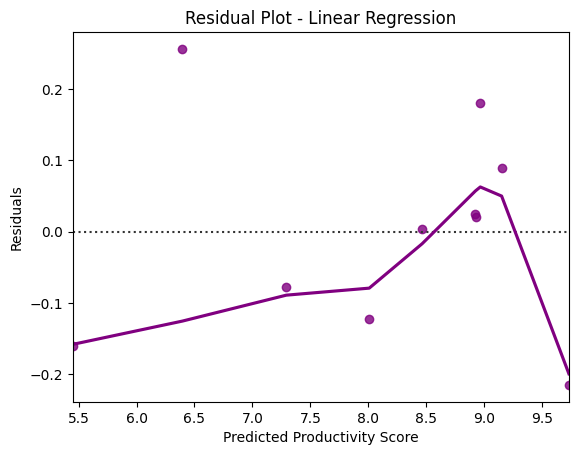

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True, color='purple')
plt.title('Residual Plot - Linear Regression')
plt.xlabel('Predicted Productivity Score')
plt.ylabel('Residuals')
plt.show()

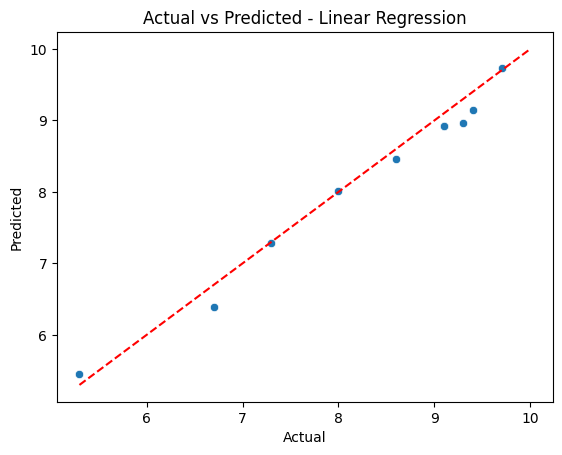

In [4]:
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Linear Regression')
plt.show()

### 📘 k-Nearest Neighbors (k=3)

k-NN R2: 0.96103618068936
MSE: 0.07077777777777743


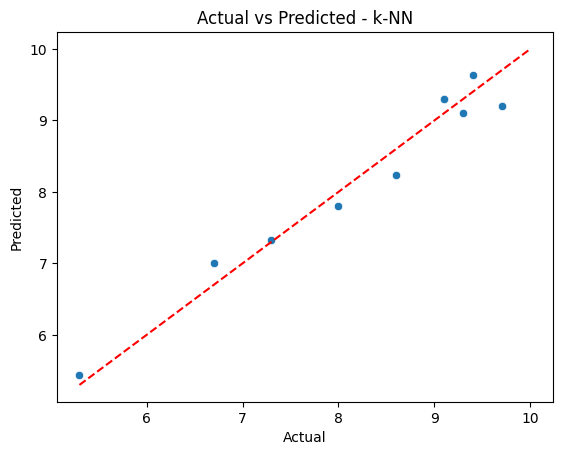

In [5]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
print('k-NN R2:', r2_score(y_test, knn_preds))
print('MSE:', mean_squared_error(y_test, knn_preds))
sns.scatterplot(x=y_test, y=knn_preds)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.title('Actual vs Predicted - k-NN')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### 🌳 Random Forest

Random Forest R2: 0.9971765797121125
MSE: 0.0051287429529477385


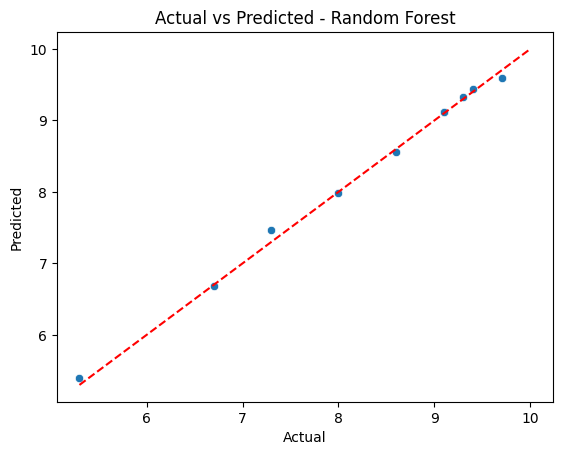

In [6]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print('Random Forest R2:', r2_score(y_test, rf_preds))
print('MSE:', mean_squared_error(y_test, rf_preds))
sns.scatterplot(x=y_test, y=rf_preds)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.title('Actual vs Predicted - Random Forest')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()